In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv(r'C:\Users\Tarun\Downloads\Diwali Sales Data.csv', encoding = 'unicode escape')

In [15]:
df.shape

(11251, 15)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [19]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis = 1, inplace=True)

In [25]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [26]:
df['Amount'] = df['Amount'].astype('int') # Change the Data Type

In [28]:
df.columns #to get the all column names

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [29]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## EXPLORATORY DATA ANALYSIS

In [32]:
#GENDER
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

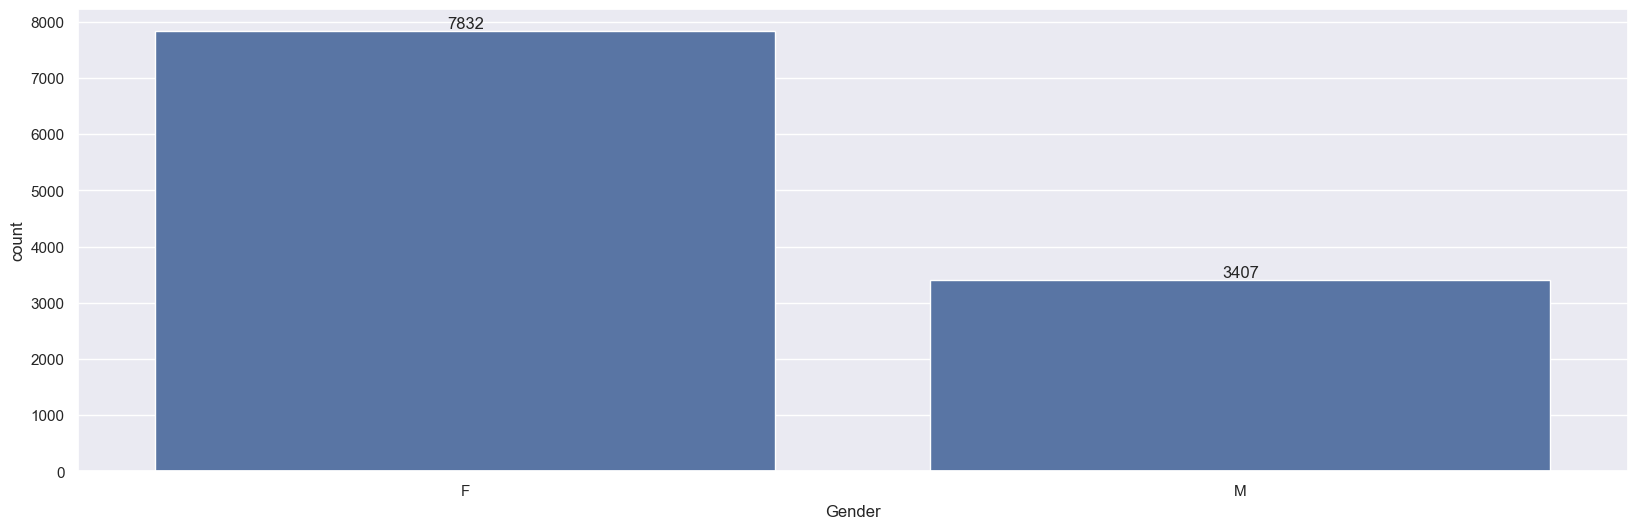

In [84]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

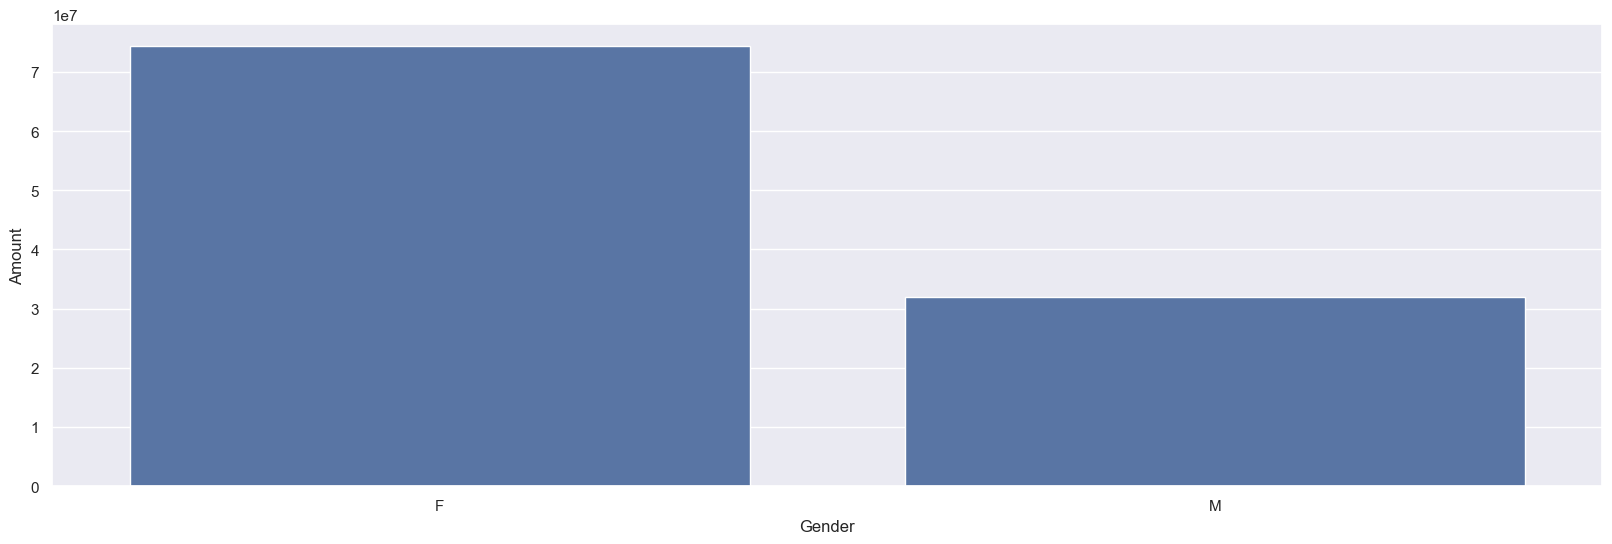

In [83]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

<Axes: xlabel='Age Group', ylabel='Amount'>

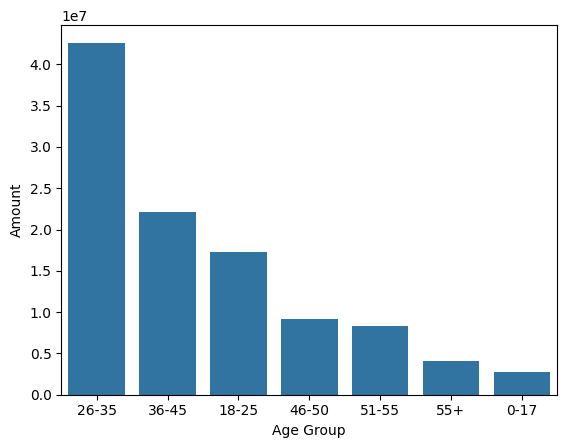

In [42]:
Sales_gen = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x= 'Age Group',y= 'Amount' ,data=Sales_gen)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

<Axes: xlabel='State', ylabel='Orders'>

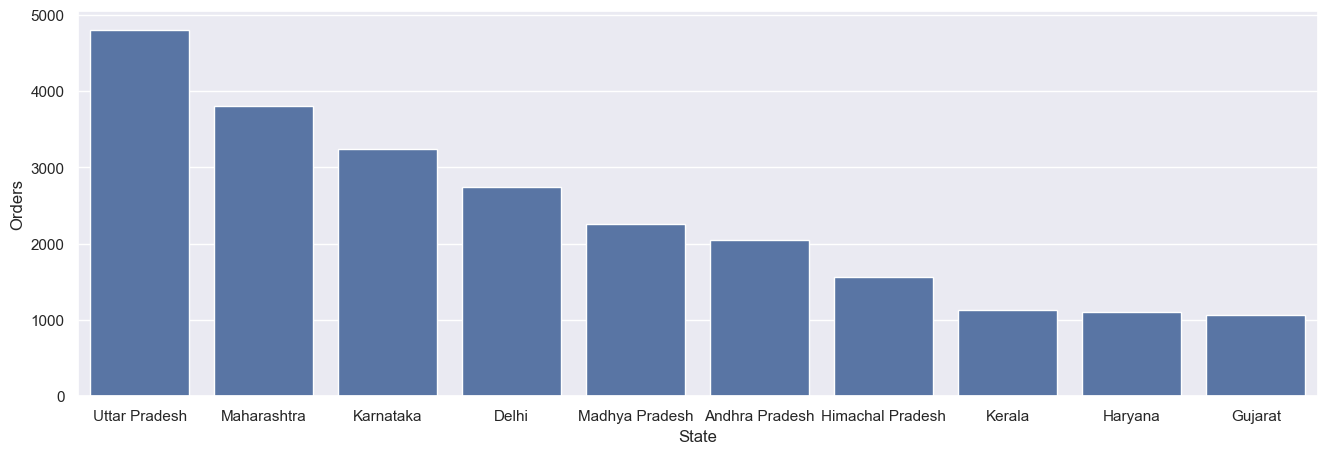

In [48]:
# Total number of orders from top 10 states
Sales_State = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x= 'State',y= 'Orders' ,data=Sales_State)

<Axes: xlabel='State', ylabel='Amount'>

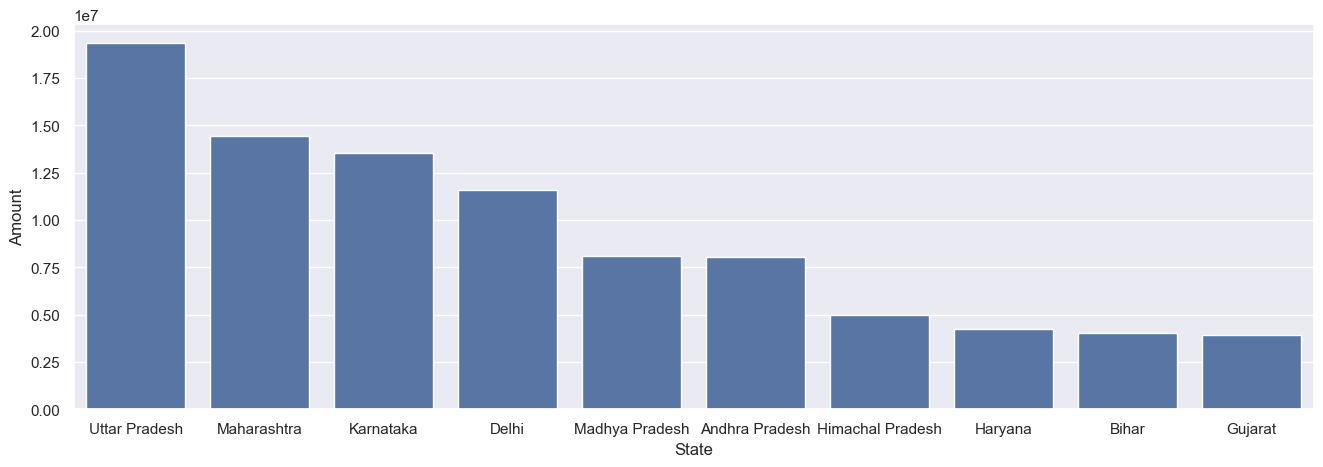

In [49]:
# Total amount/sales from top 10 states
Sales_State = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x= 'State',y= 'Amount' ,data=Sales_State)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## Martial Status

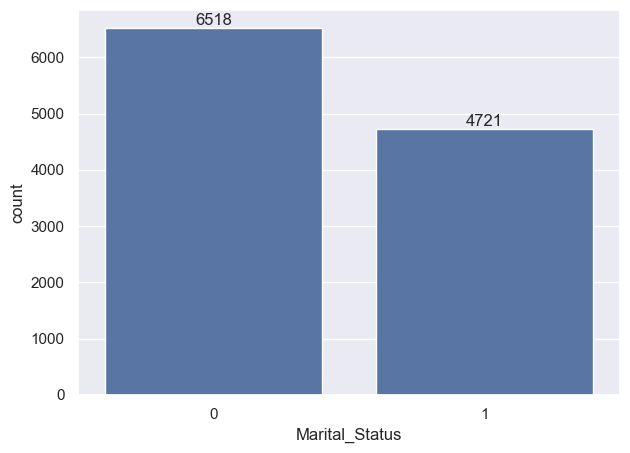

In [56]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

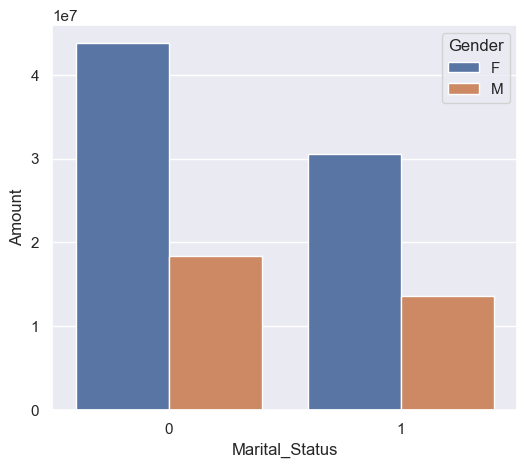

In [59]:
Sales_gen = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x= 'Marital_Status',y= 'Amount' ,hue='Gender', data=Sales_gen)

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## OCCUPATION

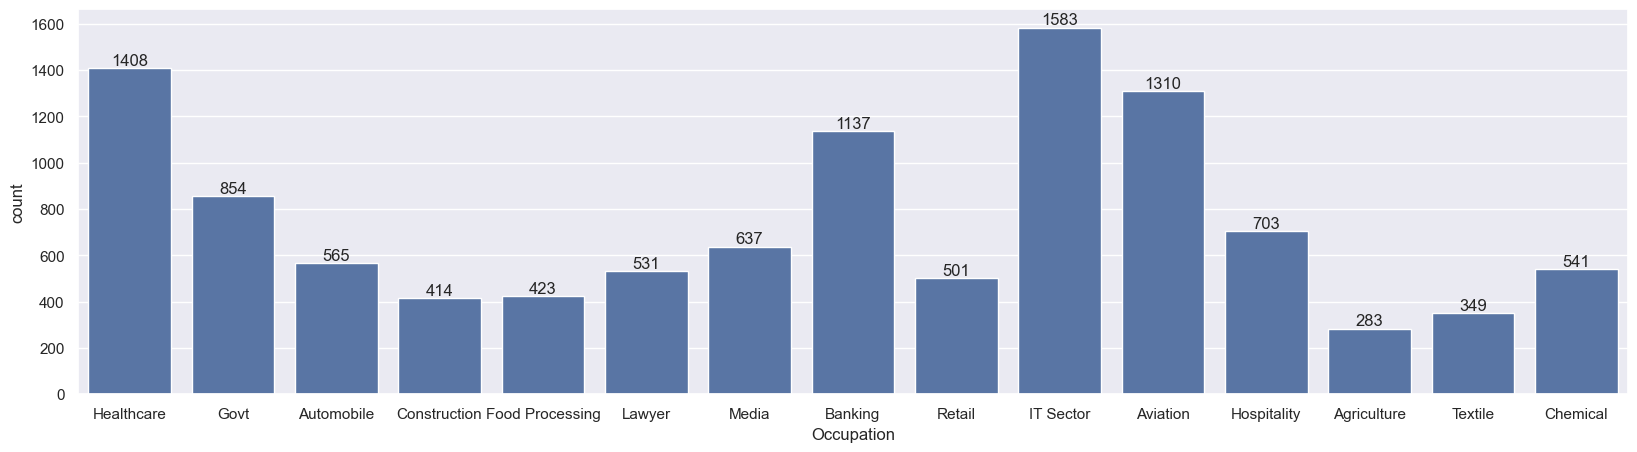

In [63]:
ax = sns.countplot(data = df, x = 'Occupation')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

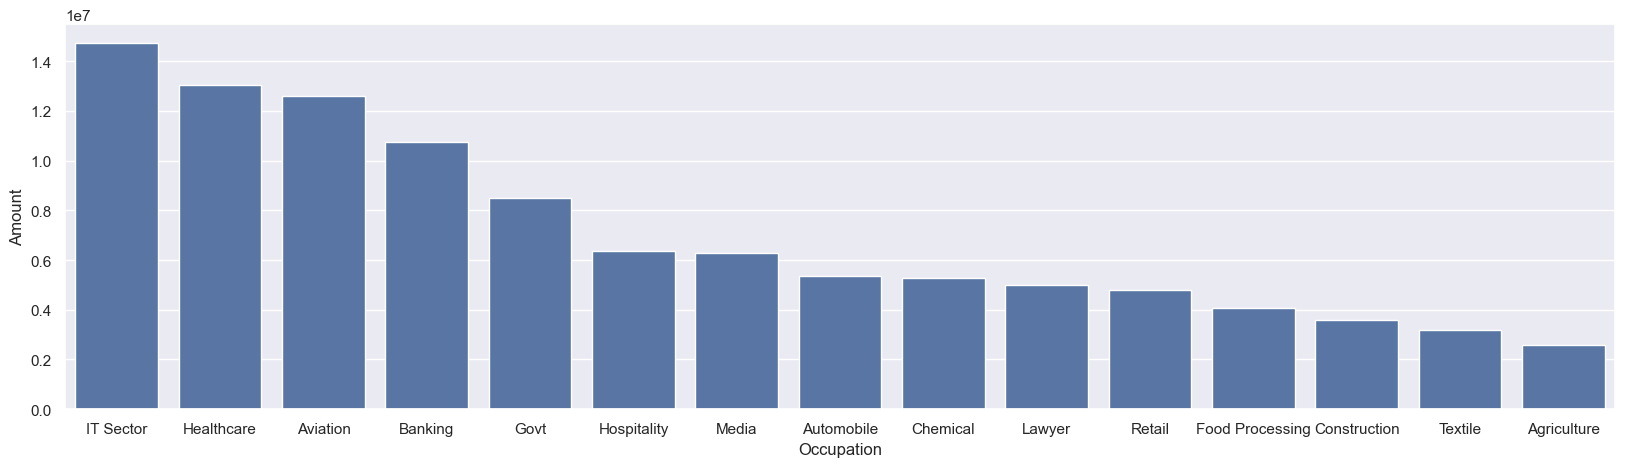

In [64]:
Sales_gen = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x= 'Occupation',y= 'Amount' ,data=Sales_gen)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## PRODUCT CATEGORY

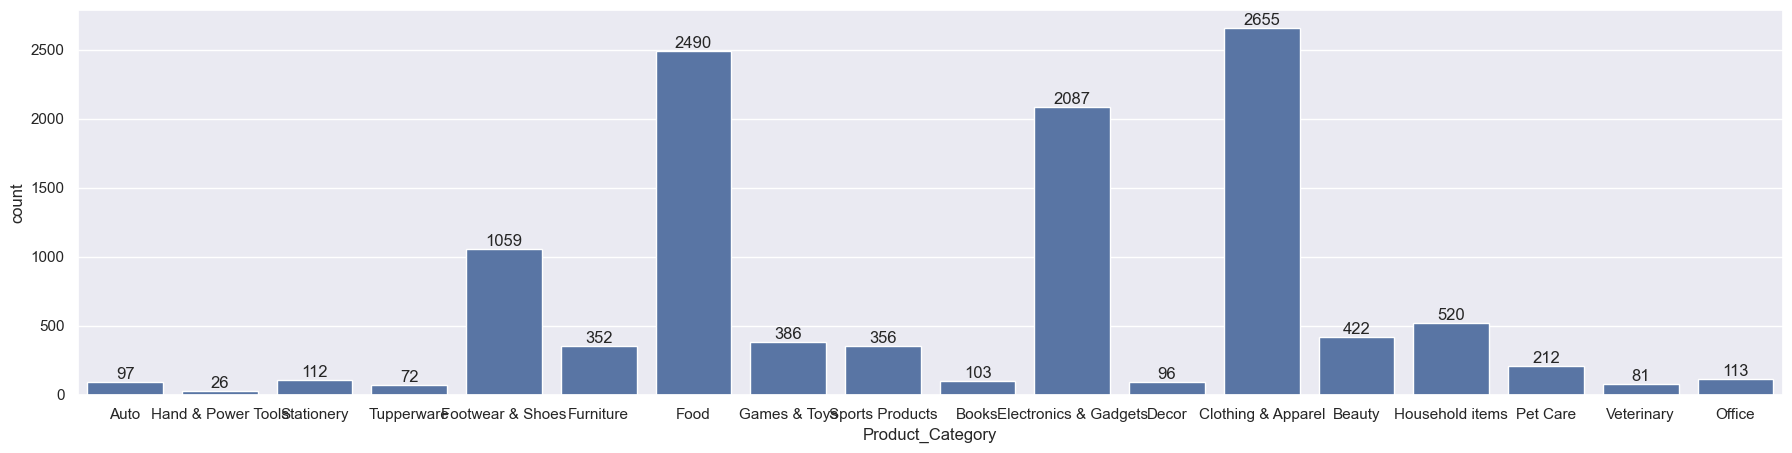

In [72]:
ax = sns.countplot(data = df, x = 'Product_Category')
sns.set(rc={'figure.figsize':(22,6)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

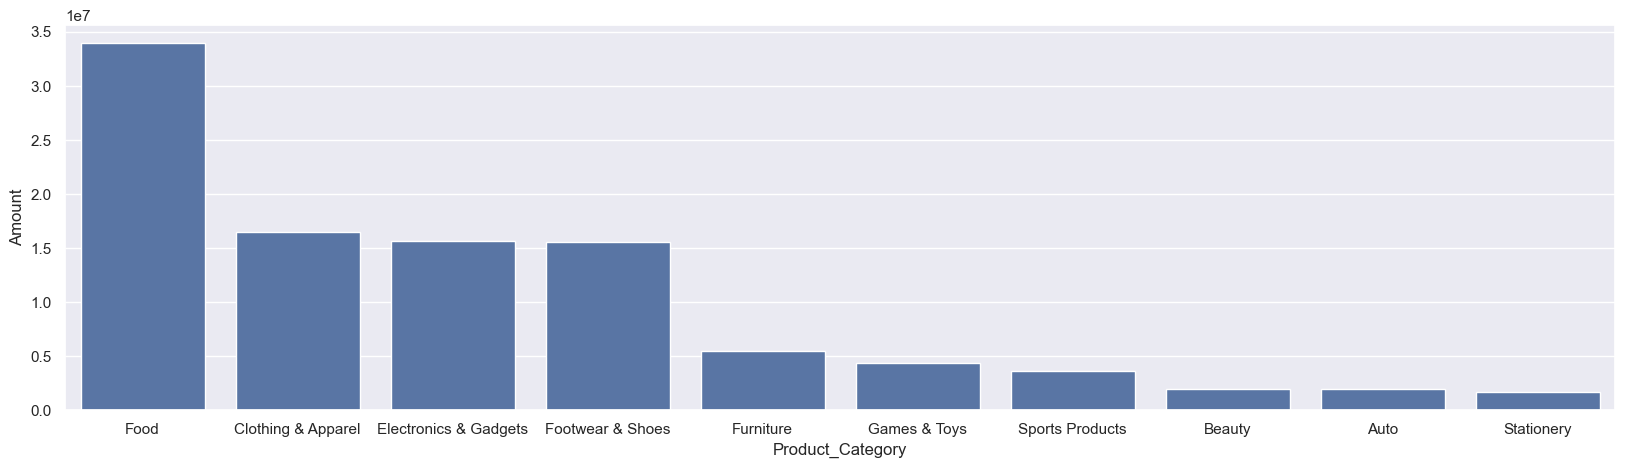

In [69]:
Sales_gen = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x= 'Product_Category',y= 'Amount' ,data=Sales_gen)

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Amount'>

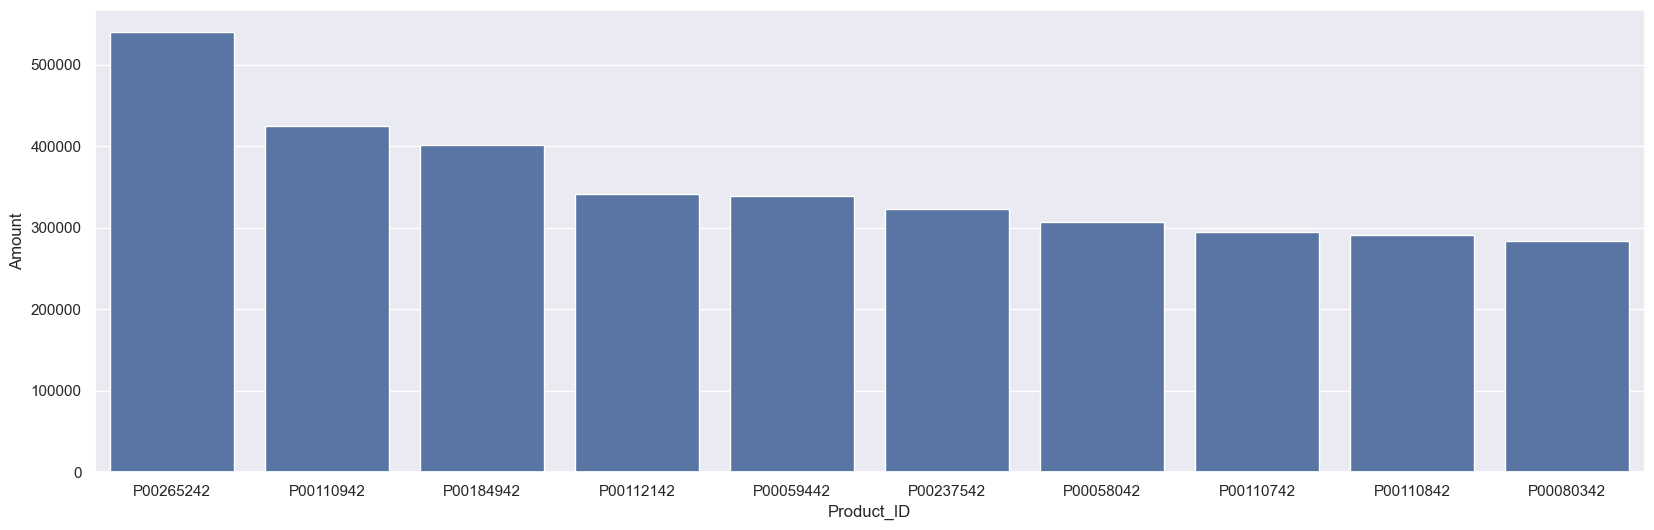

In [74]:
Sales_gen = df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x= 'Product_ID',y= 'Amount' ,data=Sales_gen)

In conclusion we say that, Married women aged 26-35 from UP, Maharashtra, and Karnataka, employed in IT, healthcare, or aviation, are more inclined to buy products in the food, clothing, and electronics categories.